<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks/10_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

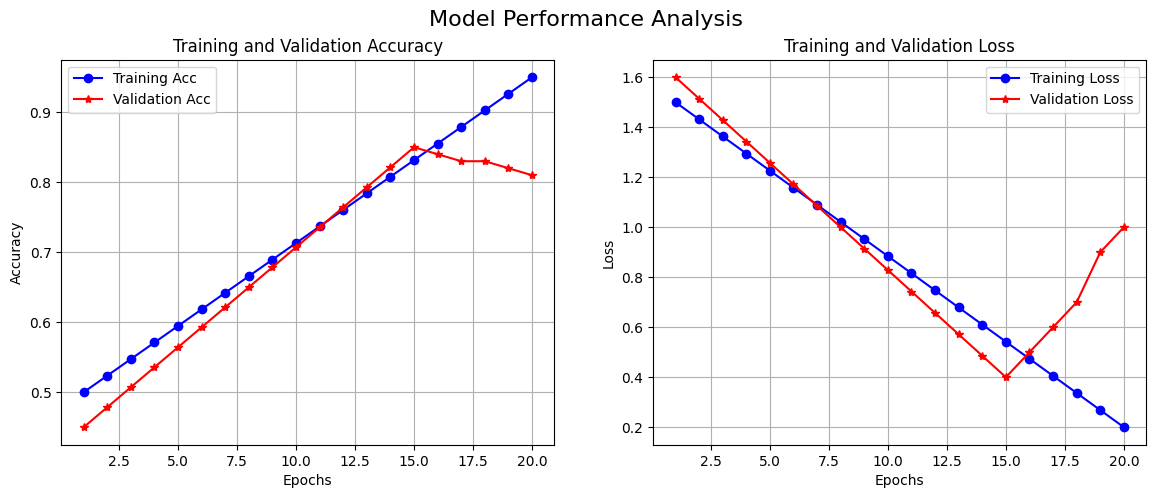

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


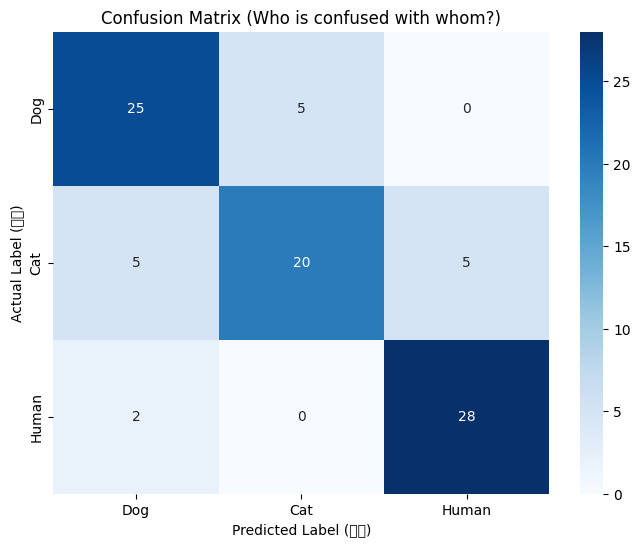


--- Detailed Classification Report ---
              precision    recall  f1-score   support

         Dog       0.78      0.83      0.81        30
         Cat       0.80      0.67      0.73        30
       Human       0.85      0.93      0.89        30

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ==========================================
# 1. 가상 학습 결과 생성 (Simulation)
# ==========================================
# 개, 고양이, 사람의 소리를 구분하는 가상의 모델
# 실제로는 model.fit()의 리턴값인 history 객체와 model.predict() 결과를 사용

epochs = range(1, 21)
# 훈련 데이터셋 성능 (점점 좋아짐)
acc = np.linspace(0.5, 0.95, 20)
loss = np.linspace(1.5, 0.2, 20)

# 검증 데이터셋 성능 (어느 순간 정체되거나 나빠짐 -> 과적합 모사)
val_acc = np.linspace(0.45, 0.85, 15).tolist() + [0.84, 0.83, 0.83, 0.82, 0.81]
val_loss = np.linspace(1.6, 0.4, 15).tolist() + [0.5, 0.6, 0.7, 0.9, 1.0]

# 가상의 예측 결과 (0: Dog, 1: Cat, 2: Human)
class_names = ['Dog', 'Cat', 'Human']
y_true = [0]*30 + [1]*30 + [2]*30  # 정답
y_pred = [0]*25 + [1]*5 + [1]*20 + [0]*5 + [2]*5 + [2]*28 + [0]*2 # 예측 (일부러 틀리게 설정)


# ==========================================
# 2. Learning Curves (학습 곡선) 시각화
# ==========================================
plt.figure(figsize=(14, 5))

# 정확도(Accuracy) 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Acc')
plt.plot(epochs, val_acc, 'r*-', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 손실(Loss) 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle('Model Performance Analysis', fontsize=16)
plt.show()

# ==========================================
# 3. Confusion Matrix (오차 행렬)
# ==========================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Who is confused with whom?)')
plt.ylabel('Actual Label (정답)')
plt.xlabel('Predicted Label (예측)')
plt.show()

# ==========================================
# 4. 상세 성적표 (Classification Report)
# ==========================================
print("\n--- Detailed Classification Report ---")
# Precision, Recall, F1-Score를 한눈에 확인
print(classification_report(y_true, y_pred, target_names=class_names))